# Data analysis on a TMDB dataset of 15000 movies

Questions:

1. What is the relationship between a movie's popularity and its average vote?
   Do more popular movies receive higher average votes?

## Data loading

In [28]:
import numpy as np
import pandas as pd

DATA_CSV_FILE = 'datasets/tmdb-15000-movies.csv'

df = pd.read_csv(DATA_CSV_FILE, lineterminator='\n')


## Data preparation

### Data cleaning

- remove non-English movies
- remove movies with less than 100 votes
- remove unused columns
- remove duplicates 
- remove empty values 

In [29]:

# from tmdb15k.average_vote_popularity import AverageVotePopularityRelationship

# q1a1 = AverageVotePopularityRelationship(df)

# Remove non-English movies.
df = df[df['original_language'] == 'en']
# Remove movies with less than 100 votes.
df = df[df['vote_count'] >= 100]
df = df[df['popularity'] <= 100]

# Remove unused columns.
df = df.drop(
    [
        'Unnamed: 0',
        'adult',
        'backdrop_path',
        'cast',
        'crew',
        'genres',
        'keywords',
        'original_language',
        'poster_path',
        'release_date',
        'video',
        'vote_count',
    ],
    axis='columns',
)

# Remove rows with null values.
df = df.dropna()
# Fill null values with empty string.
df = df.fillna('')
# Remove duplicate rows.
df = df.drop_duplicates()

# # Convert release_date to datetime.
# df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')

### Data transformation

No specific transformation needed - `vote_average` and `popularity` are 
numerical values.

In [30]:
print("and now that you don't have to be perfect, you can be good")
print("but you're already perfect")

and now that you don't have to be perfect, you can be good
but you're already perfect


### Data standardization

We need to standardize `vote_average` and `popularity`.

Let's find out their `min`, `max`, `mean`, `median` and `stddev`.

----- vote_average -----
count    7639.000000
mean        6.659733
std         0.644798
min         0.000000
25%         6.200000
50%         6.600000
75%         7.100000
max        10.000000
Name: vote_average, dtype: float64
----- popularity -----
count    7639.000000
mean       30.558005
std       163.157714
min         0.600000
25%        11.445500
50%        15.880000
75%        25.573000
max      9065.306000
Name: popularity, dtype: float64


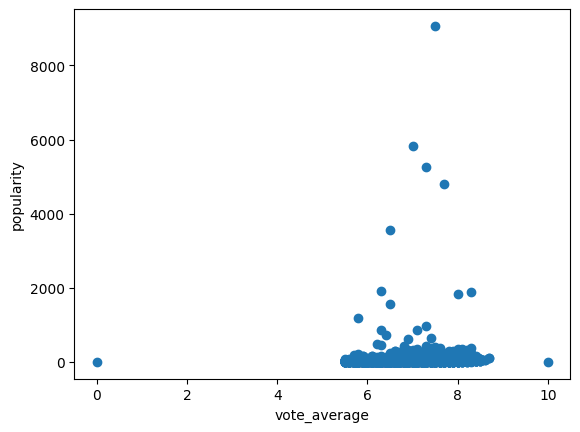

In [31]:
print('----- vote_average -----')
print(df['vote_average'].describe())

print('----- popularity -----')
print(df['popularity'].describe())

import matplotlib.pyplot as plt

plt.scatter(df['vote_average'], df['popularity'])
plt.xlabel('vote_average')
plt.ylabel('popularity')
plt.show()

`vote_average` seems to fit in it's advertised range of __0__ - __10__, whereas
`popularity` seems to have quite some outliers. We will do Min-Max Normalization
for the former and Z-Score Standardization for the latter. 

In [32]:
import tmdb15k.dataset as dataset

dataset.DataStandardization.normalize_min_max(df, 'vote_average', 'vote_average_normalized')
dataset.DataStandardization.normalize_min_max(df, 'popularity', 'popularity_standardized')

,movie_id,original_title,overview,popularity,title,vote_average,vote_average_normalized,popularity_standardized
4531,1005112,Happy Sorry Day,Akash is an egoistic man who can’t say sorry t...,1.400,Happy Sorry Day,10.0,1.00,0.000088
4675,943443,Ribbons for Peace,"""Made in the aftermath of Indian and Pakistani...",0.600,Ribbons for Peace,0.0,0.00,0.000000
5871,238,The Godfather,"Spanning the years 1945 to 1955, a chronicle o...",106.435,The Godfather,8.7,0.87,0.011676
5872,278,The Shawshank Redemption,Framed in the 1940s for the double murder of h...,99.374,The Shawshank Redemption,8.7,0.87,0.010897
5874,240,The Godfather Part II,In the continuing saga of the Corleone crime f...,62.216,The Godfather Part II,8.6,0.86,0.006797
...,...,...,...,...,...,...,...,...
15866,77663,Killing Season,"Two veterans of the Bosnian War, one American,...",14.704,Killing Season,5.5,0.55,0.001556
15867,14435,My Bloody Valentine,"Ten years ago, a tragedy changed the town of H...",15.926,My Bloody Valentine,5.5,0.55,0.001691
15868,9022,All the Boys Love Mandy Lane,"Beautiful Mandy Lane isn't a party girl but, w...",12.071,All the Boys Love Mandy Lane,5.5,0.55,0.001265
15869,512025,There's Someone Inside Your House,"As the countdown to graduation begins, student...",18.521,There's Someone Inside Your House,5.5,0.55,0.001977


## Data analysis

**1. Descriptive analysis**

Let's re-run the descriptions on processed columns.

I've run the two processes and here are the results:

----- vote_average_normalized -----
count    7639.000000
mean        0.665973
std         0.064480
min         0.000000
25%         0.620000
50%         0.660000
75%         0.710000
max         1.000000
Name: vote_average_normalized, dtype: float64
----- popularity_standardized -----
count    7639.000000
mean        0.003305
std         0.017999
min         0.000000
25%         0.001196
50%         0.001686
75%         0.002755
max         1.000000
Name: popularity_standardized, dtype: float64


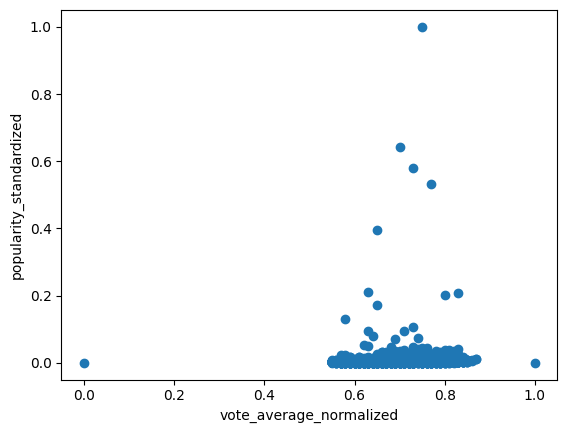

In [33]:
print('----- vote_average_normalized -----')
print(df['vote_average_normalized'].describe())

print('----- popularity_standardized -----')
print(df['popularity_standardized'].describe())

import matplotlib.pyplot as plt

plt.scatter(df['vote_average_normalized'], df['popularity_standardized'])
plt.xlabel('vote_average_normalized')
plt.ylabel('popularity_standardized')
plt.show()

We might want to do what GPT-4 says, we'll see.

> If you're concerned about the effect of these outliers on your subsequent 
> analysis, you might consider some additional preprocessing steps. You could, 
> for example, apply a logarithmic transformation to popularity before 
> standardizing, to reduce the impact of extreme values. Alternatively, you 
> might decide to remove movies that have a popularity above a certain 
> threshold, if you think these are likely to be anomalies or errors. The best 
> approach depends on your specific research question and analysis plan.

**2. Correlation analysis**

In [34]:
correlation_coefficient = df['popularity_standardized'].corr(df['vote_average_normalized'])
print(correlation_coefficient)

0.06920509775737863
